## Simulation of Multivariate data and Plotting Confidence Regions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.stats import norm, chi2

#### Generate random sample and find correlation matrix

In [2]:
def generate_correlated_data(num_samples, mu, cov_matrix):
    init_x = norm.rvs(size=(len(cov_matrix),num_samples),random_state = 101)
    C = la.cholesky(cov_matrix, lower=True)
    X = np.dot(C, init_x)
    #move the center to mu
    X = X + np.outer(np.ones(num_samples),mu).transpose()
    return X

In [3]:
cov_mat = np.array([[1.1,-1],[-1,1]])
mu = np.array([[0,0]])
X = np.random.multivariate_normal(mean = [0,0], cov = cov_mat, size = 100).transpose()
np.corrcoef(X[0],X[1])

array([[ 1.        , -0.93631409],
       [-0.93631409,  1.        ]])

In [4]:
generate_correlated_data(100, [0,0], cov_mat)

array([[ 2.83896806e+00,  6.58791143e-01,  9.52286389e-01,
         5.28416909e-01,  6.82898265e-01, -3.34903591e-01,
        -8.89470644e-01,  6.35541820e-01, -2.11667271e+00,
         7.76246562e-01,  5.54624272e-01, -6.17748971e-01,
         1.97905310e-01, -7.95911727e-01, -9.78787450e-01,
         1.00167172e+00,  2.00106773e-01,  2.07533819e+00,
         2.73316154e+00,  7.16870167e-01,  3.17438201e-01,
         1.77639159e+00, -1.78935802e+00, -1.21569470e+00,
        -1.41422141e-01,  4.09589057e-01,  1.75051059e-01,
         1.93507183e-01,  8.47129110e-01,  7.65207530e-02,
         6.69965472e-01,  3.45735955e-01, -5.21367098e-01,
        -7.90874975e-01, -9.89452983e-01,  5.08411817e-01,
        -1.22472888e-01,  1.99457726e+00,  2.49749661e-01,
         2.09410658e+00, -1.04174355e+00,  2.06405062e-01,
        -1.19212291e+00,  3.84367053e-04,  1.07606126e+00,
        -1.64241268e-01, -3.31204855e-02,  6.81543084e-01,
         2.26002202e+00, -6.40044888e-01, -7.92191900e-0

In [5]:
rhos = np.array([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
rhos_mesh = rhos.reshape(3,3)
rhos_mesh

array([[-1.  , -0.75, -0.5 ],
       [-0.25,  0.  ,  0.25],
       [ 0.5 ,  0.75,  1.  ]])

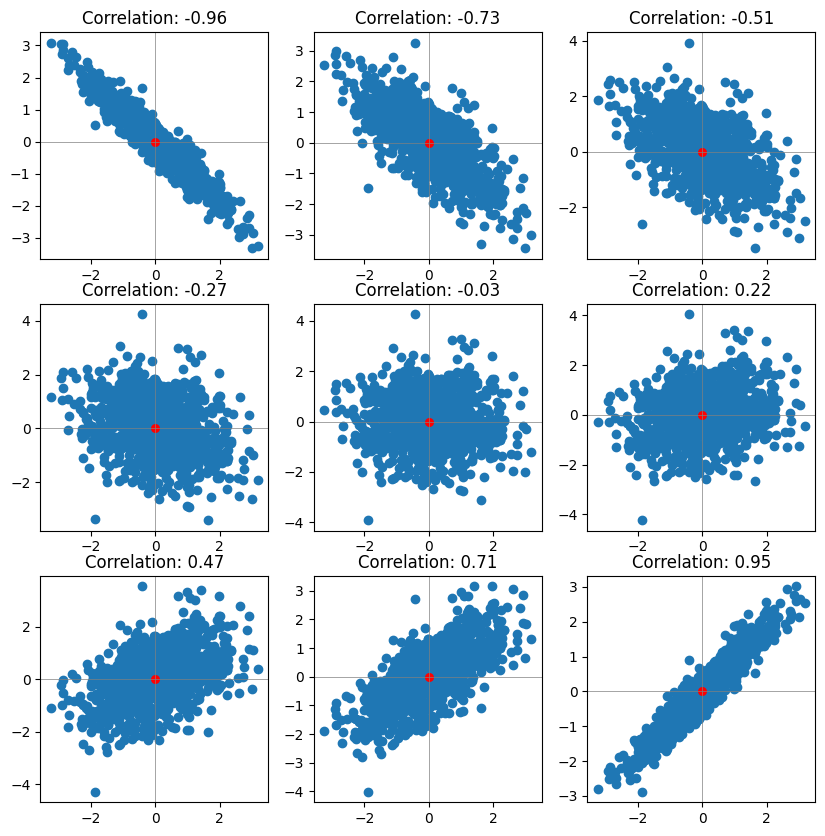

In [6]:
mu=[0,0]
num_samples = 1000
num_rows, num_cols = rhos_mesh.shape
fig, axs = plt.subplots(figsize = (10,10), nrows = num_rows, ncols = num_cols)
for rhos_row, ax_row in zip(rhos_mesh, axs):
    for rho,ax in zip(rhos_row, ax_row):
        cov_mat = [[1.1, rho],[rho,1]]
        X = generate_correlated_data(num_samples, mu, cov_mat)
        ax.scatter(X[0],X[1])
        ax.scatter(mu[0], mu[1], s=30, c = 'red')
        ax.axhline(c ='grey', lw=0.5)
        ax.axvline(c = 'grey',lw = 0.5)
        corr_computed = np.corrcoef(X[0],X[1])[0,1].round(2)
        ax.set_title(f'Correlation: {corr_computed}')
plt.show()

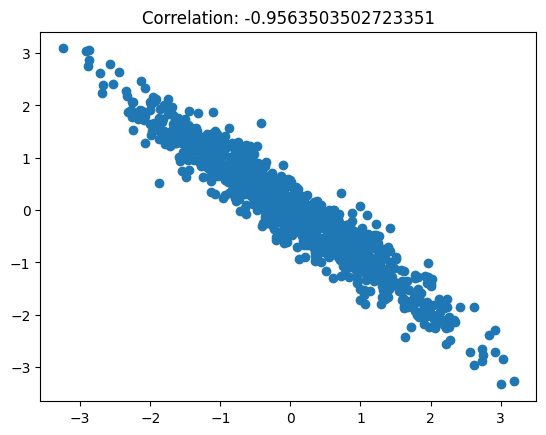

In [7]:
init_x = norm.rvs(size=(2,1000))
cov_mat = np.array([[1.1,-1],[-1,1]])
mu = np.array([0,0])

X= generate_correlated_data(num_samples, mu, cov_mat)
corr = np.corrcoef(X[0],X[1])[0,1]
plt.scatter(X[0],X[1])
plt.title(f"Correlation: {corr}")
plt.show()

#### Confidence Regions

##### Write a code to generate univariate normal distribution data and draw QQ plot for this data

In [8]:
import scipy.stats as stats

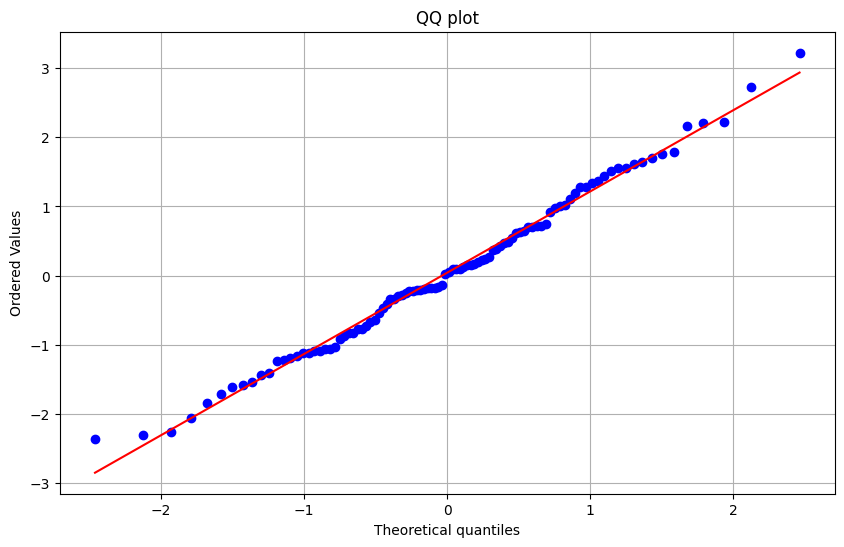

In [9]:
X = np.random.normal(loc = 0, scale = 1, size=100)
plt.figure(figsize=(10,6))
stats.probplot(X, dist='norm',plot=plt)
plt.title("QQ plot")
plt.grid(True)
plt.show()


In [10]:
X = np.array([-1, -0.1, 0.16, 0.41, 0.62, 0.80, 1.26, 1.54, 1.71, 2.30])
stats.norm(0,1).cdf(X)

array([0.15865525, 0.46017216, 0.56355946, 0.65909703, 0.73237111,
       0.7881446 , 0.89616532, 0.93821982, 0.95636706, 0.98927589])

## Drawing confidence ellipse

In [11]:
from matplotlib.patches import Ellipse

In [12]:
num_samples = 1000 
mu = [1,2] 
cov_mat = [[1.1,0.75],[0.75,1]] 
X = generate_correlated_data(num_samples,mu,cov_mat) 
data = pd.DataFrame(X.transpose()) 
data.head() 

,0,1
0,3.838968,4.391164
1,1.658791,2.396902
2,1.952286,2.380469
3,1.528417,2.666170
4,1.682898,2.109769


In [13]:
def draw_confidence_ellipse(data,alpha,**kwargs):
    dof = len(data.columns) 
    n,p = data.shape
    if n-p >=40:  
        c = np.sqrt(chi2.ppf(1-alpha, dof))
    else:
        return "Error"
    mean_vec = np.array(data.mean()) 
    cov_matrix = np.array(data.cov()) 
    # find the eigenvalues and eigenvectors 
    eigvals, eigvecs = la.eigh(cov_matrix) 
    # sorting based on the descending order of eigenvalues 
    order = eigvals.argsort()[::-1] 
    eigvals, eigvecs = eigvals[order], eigvecs[:, order] 
    # Width and height of ellipse to draw 
    width, height = 2 * c * np.sqrt(eigvals) 
    #Angle of the major axis 
    vx, vy =  eigvecs[:,0][0], eigvecs[:,0][1] 
    angle = np.degrees(np.arctan2(vy,vx)) 
    return Ellipse(mean_vec, 
    width = width, 
    height = height, 
    angle = angle, 
    fill = False, 
    label = f"{100*(1-alpha):.0f}%", **kwargs)

In [14]:
def plot_data_confidence_ellipse(data,ax,alphas = [0.01,0.05,0.1],colors = ['Red','Blue','Orange']): 
    ax.scatter(data[0],data[1]) 
    ax.scatter(data.mean()[0], data.mean()[1], s=100) 
    for alpha,color in zip(alphas,colors): 
        e = draw_confidence_ellipse(data,alpha=alpha,color=color,lw=2) 
        ax.add_patch(e)

In [15]:
def plot_confidence_regions(data,ax): 
    fig, ax = plt.subplots(figsize=(8,8)) 
    plot_data_confidence_ellipse(data=data,ax=ax) 
    plt.legend() 
    plt.show() 

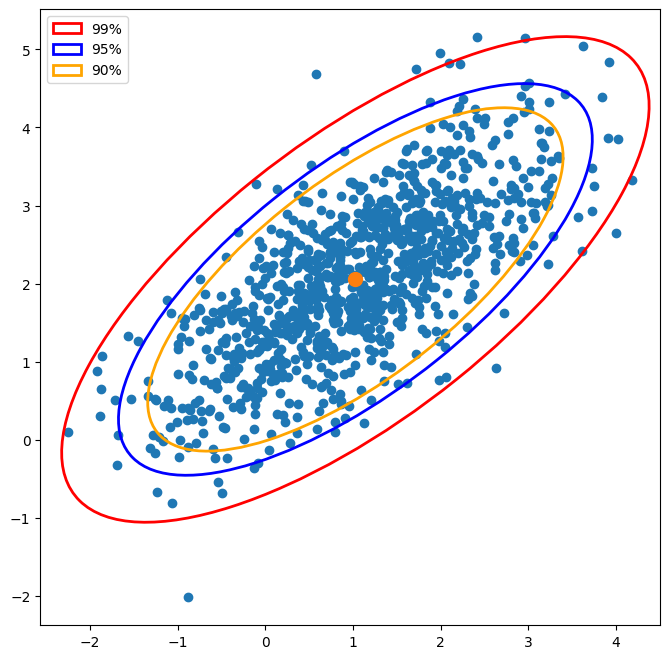

In [16]:
plot_confidence_regions(data,ax)

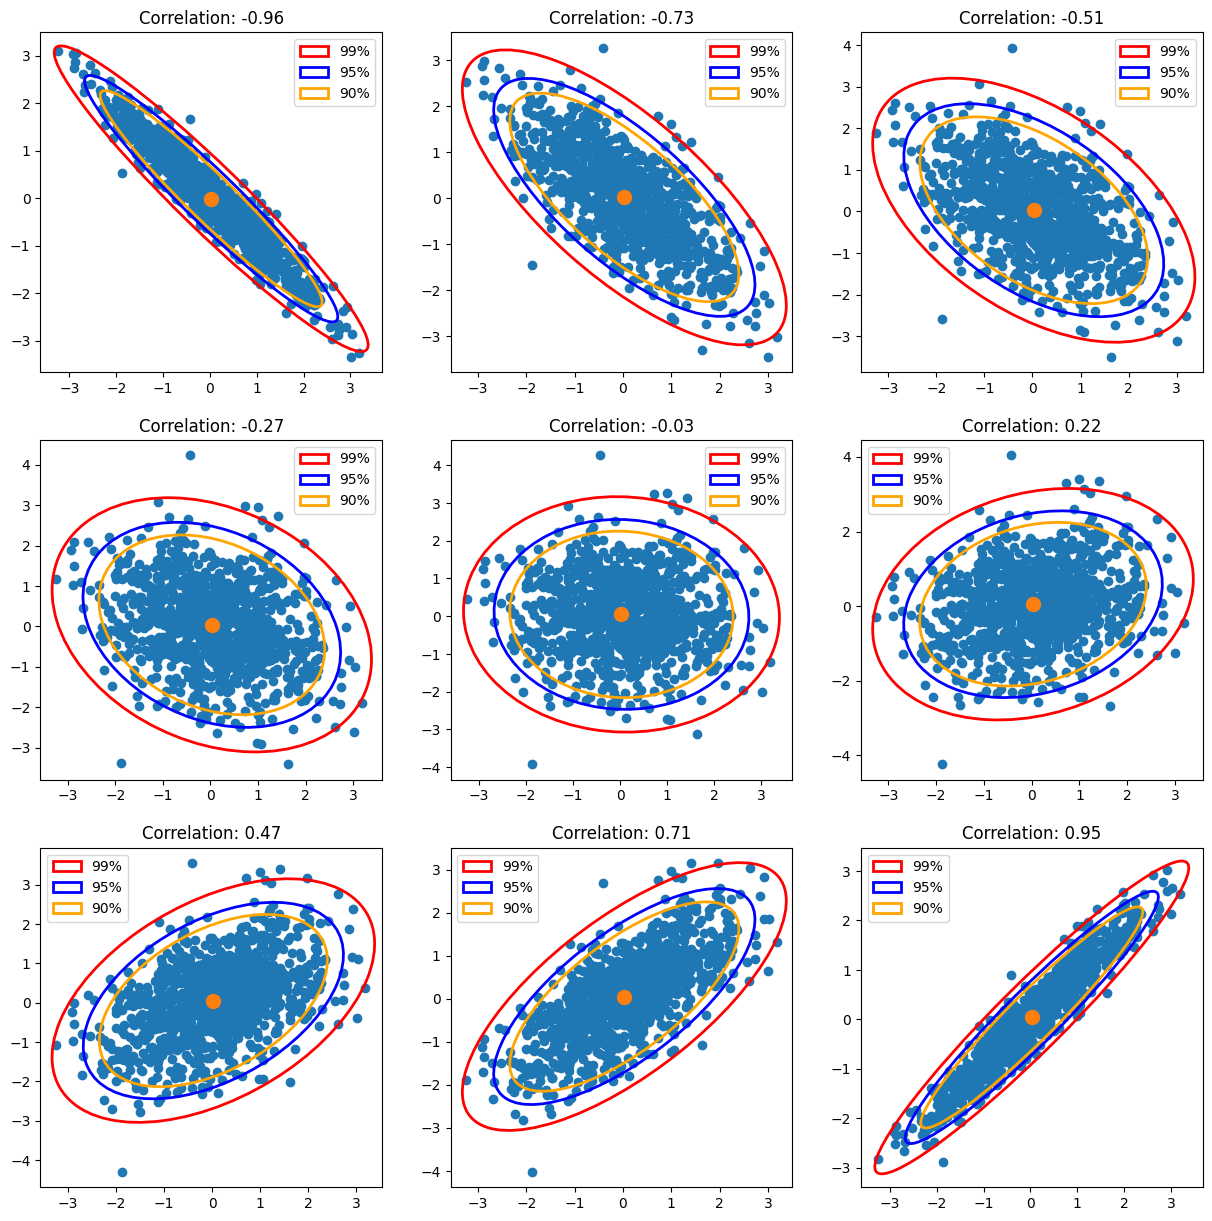

In [17]:
num_samples = 1000 
mu = [0,0] 
rhos = np.array([-1,-0.75,-0.5,-0.25,0,.25,.5,.75,1]) 
rhos_mesh = rhos.reshape(3,3) 
nrows,ncols = rhos_mesh.shape 
fig, axs = plt.subplots(figsize = (15,15),nrows=nrows, ncols=ncols) 
for rhos_row, ax_row in zip(rhos_mesh,axs): 
    for rho, ax in zip(rhos_row,ax_row): 
        cov_mat = [[1.1,rho],[rho,1]] 
        X = generate_correlated_data(num_samples,mu,cov_mat) 
        data = pd.DataFrame(X.transpose()) 
        plot_data_confidence_ellipse(data=data,ax=ax) 
        ax.legend() 
        ax.set_title(f'Correlation: {data.corr()[0][1].round(2)}') 
plt.show() 